# Projeto 1
MS211


## Abrindo o arquivo e plotando o gráfico

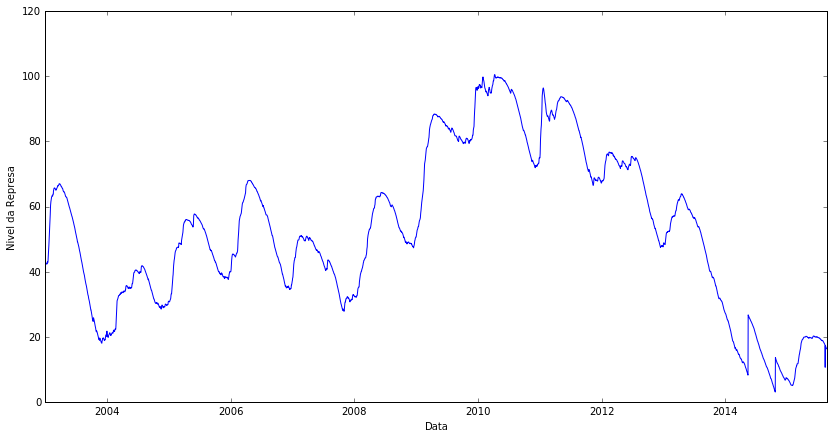

In [1]:
#Bibliotecas importadas para abrir arquivo CSV, usar datas e plotar gráficos
import csv
from datetime import datetime, timedelta
import matplotlib.dates as mdate
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


dados = list( csv.reader( open('DadosCantareira22082015.csv','r') ) )

datas = list()
dias = list()
n = 0
niveis = list()

for dado in dados:
    dias.append(n)
    n = n + 1
    data = dado[0]
    data_aux = datetime(year=int(data[0:4]), month=int(data[4:6]), day=int(data[6:8]))
    datas.append(data_aux)
    niveis.append(float(dado[1]))
    
plt.plot(datas,niveis)
plt.gcf().set_size_inches(14,7)
plt.ylabel('Nivel da Represa')
plt.xlabel('Data')
plt.show()

## Ajuste de grau 1

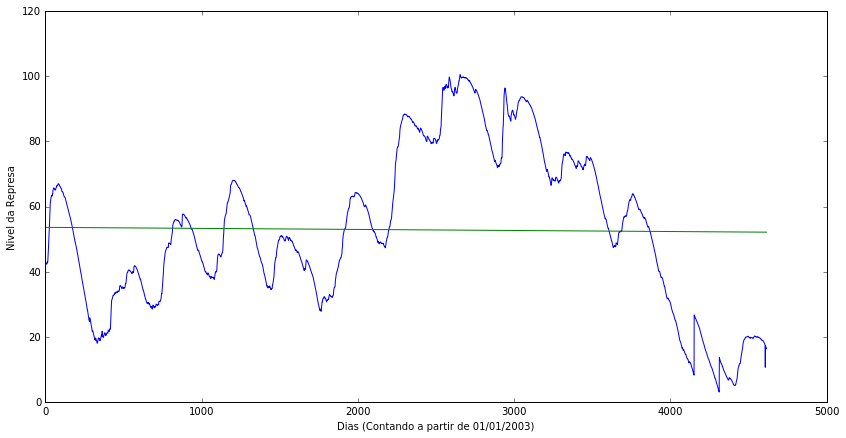

In [2]:
coeficientes = np.polyfit(dias,niveis,1)

polinomio = np.poly1d(coeficientes)

plt.plot(dias, niveis, dias, polinomio(dias))
plt.ylabel('Nivel da Represa')
plt.xlabel('Dias (Contando a partir de 01/01/2003)')
plt.gcf().set_size_inches(14,7)
plt.show()

### Calculando o 

## Ajuste de grau 4

[  1.81945642e-12  -2.33302577e-08   8.48540234e-05  -8.77623569e-02
   6.11950226e+01]
           4             3             2
1.819e-12 x - 2.333e-08 x + 8.485e-05 x - 0.08776 x + 61.2


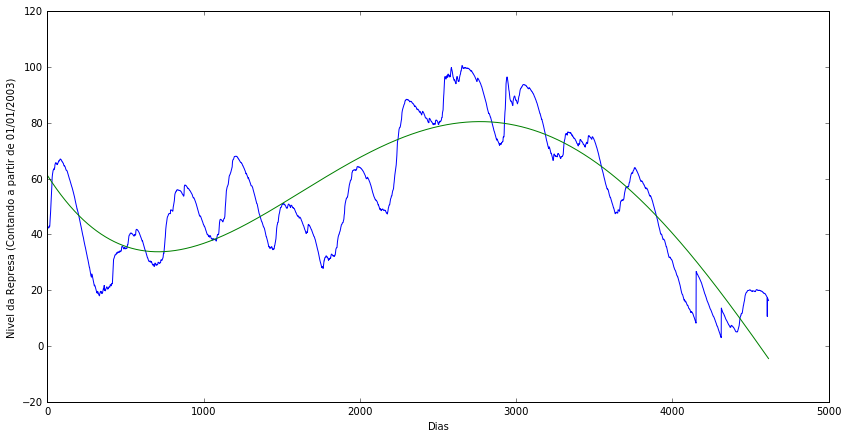

In [3]:
coeficientes = np.polyfit(dias,niveis,4)

polinomio = np.poly1d(coeficientes)

print(coeficientes)
print(polinomio)

plt.plot(dias, niveis, dias, polinomio(dias))
plt.ylabel('Nivel da Represa (Contando a partir de 01/01/2003)')
plt.xlabel('Dias')
plt.gcf().set_size_inches(14,7)
plt.show()
